# Lab | Random Forests

### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data.
- Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score


### Reading Data:

In [2]:
categorical = pd.read_csv('/Users/Hector_Martin/Documents/Labs/week7/lab-random-forests/files_for_lab/categorical.csv')
numerical = pd.read_csv('/Users/Hector_Martin/Documents/Labs/week7/lab-random-forests/files_for_lab/numerical.csv')
target = pd.read_csv('/Users/Hector_Martin/Documents/Labs/week7/lab-random-forests/files_for_lab/target.csv')

### Data Exploration:

In [3]:
#Checking the head and the shape of each Dataframe:

display(categorical.head(5))
print(categorical.shape)
display(numerical.head(5))
print(numerical.shape)
display(target.head(5))
print(target.shape)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


(95412, 22)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


(95412, 315)


,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


(95412, 2)


We have the same amount of rows in across all Dataframes, therefore therefore there shouldn't be any problem concatenating all the data so far.

### Checking if there is any NaN in each Dataframe:

In [4]:
#categorical.isna().sum()

#Since there are many Numerical columns we will use a For Loop to check each column, one by one, if there are any NaNs
#numerical.isna().sum()
#for col in numerical.columns:
    #print(col, numerical[col].isna().sum())
#target.isna().sum()

## Random Forest Classifier: 

We are going to predict whether a Customer is going to make a Donation or not.

### Defining X:

In [5]:
X = pd.concat([numerical, categorical], axis =1)

### Defining y:

In [6]:
#TARGET_B contains 2 values:
# 0: Donation not made
# 1: Donation made

y = target[['TARGET_B']]

### Train-Test split:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

#Transform NUMPY ARRAYS into dataframes
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,columns=X.columns)

### Numerical and Categorical split:

In [8]:
X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = object)
X_test_cat  = X_test_df.select_dtypes(include = object)

### Enconding Categorical variables:

In [9]:
#One Hot Encoder:

#On Train Set:

encoder = OneHotEncoder(drop='first') 
encoder.fit(X_train_cat)
X_train_encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=cols, index = X_train_cat.index)
display(X_train_encoded_df.head())

#On Test Set:

X_test_encoded = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=cols, index = X_test_cat.index)
display(X_test_encoded_df.head())

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
65175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32526,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
63533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61555,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36693,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
6897,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30988,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
57472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
21853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Concatenating the Dataframes:

In [10]:
X_train_prescaled = pd.concat([X_train_num, X_train_encoded_df], axis =1)
X_test_prescaled = pd.concat([X_test_num, X_test_encoded_df], axis =1)

### Scaling X_train and X_test:

In [11]:
from sklearn.preprocessing import StandardScaler

#On Train set:
transformer = StandardScaler()
transformer.fit(X_train_prescaled)
X_train_scaled = transformer.transform(X_train_prescaled)#this is a numpy array
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_prescaled.columns, index = X_train_prescaled.index)
display(X_train_scaled_df.head())

#On Test set:
X_test_scaled = transformer.transform(X_test_prescaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled , columns=X_test_prescaled.columns, index = X_test_prescaled.index)
display(X_test_scaled_df.head())

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
65175,-0.056955,0.168724,-1.845500,0.717794,-0.359328,-0.207691,-0.214318,0.086269,-0.432081,0.263883,...,-0.542195,1.015142,-0.505525,-0.653476,2.260474,-0.458442,-0.54915,-0.545734,-0.506485,-0.382251
32526,-0.054842,0.930882,-1.256941,0.348291,-0.142177,-0.207691,2.229416,-1.638543,0.754216,-1.101594,...,-0.542195,-0.985084,-0.505525,1.530279,-0.442385,-0.458442,-0.54915,-0.545734,-0.506485,-0.382251
63533,-0.055899,1.069456,1.097296,0.348291,0.183550,0.777190,-0.476147,1.545725,-1.618377,0.036303,...,-0.542195,1.015142,-0.505525,-0.653476,-0.442385,-0.458442,-0.54915,1.832395,-0.506485,-0.382251
61555,-0.054842,2.039475,0.508737,-1.129723,-0.250753,-0.207691,-0.912528,-0.776137,0.019842,1.856940,...,1.844356,-0.985084,-0.505525,-0.653476,-0.442385,-0.458442,-0.54915,-0.545734,1.974392,-0.382251
36693,-0.056955,0.003242,0.508737,0.717794,-0.359328,-0.207691,-0.650700,0.086269,-0.206119,-0.646435,...,1.844356,-0.985084,-0.505525,-0.653476,2.260474,-0.458442,-0.54915,-0.545734,1.974392,-0.382251


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
6897,-0.055899,-1.217018,-0.079822,-0.021213,-0.359328,-0.207691,1.094825,0.616980,0.358784,-0.418856,...,-0.542195,1.015142,-0.505525,-0.653476,-0.442385,-0.458442,-0.549150,-0.545734,-0.506485,2.616085
30988,-0.055899,0.003242,-0.668382,0.717794,-0.359328,-0.207691,0.658444,-0.112748,0.471764,0.491463,...,-0.542195,1.015142,-0.505525,-0.653476,2.260474,-0.458442,1.820997,-0.545734,-0.506485,-0.382251
57472,-0.054842,0.003242,0.508737,0.717794,-0.359328,-0.207691,1.967588,-1.041493,1.827531,0.491463,...,1.844356,-0.985084,-0.505525,-0.653476,-0.442385,2.181300,1.820997,-0.545734,-0.506485,-0.382251
21853,-0.056955,0.003242,0.508737,0.717794,-0.359328,-0.207691,-0.388871,-0.975154,1.319119,0.719042,...,-0.542195,1.015142,-0.505525,-0.653476,-0.442385,-0.458442,-0.549150,-0.545734,-0.506485,2.616085
12122,-0.056955,-0.246999,-0.668382,0.717794,-0.359328,-0.207691,-0.737976,-0.245426,0.471764,0.946622,...,1.844356,-0.985084,-0.505525,-0.653476,-0.442385,2.181300,1.820997,-0.545734,-0.506485,-0.382251


### Checking Class imbalance on y:

0    90569
1     4843
Name: TARGET_B, dtype: int64


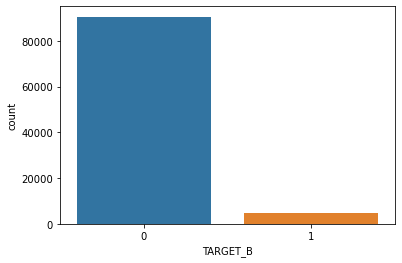

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

count_classes = y['TARGET_B'].value_counts()
print(count_classes)
sns.countplot(x = 'TARGET_B', data = y);
plt.show()

There is a huge class imbalance to upscale.

### Oversampling y to correct Class imbalance:

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train_scaled_df, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,-0.056955,0.168724,-1.845500,0.717794,-0.359328,-0.207691,-0.214318,0.086269,-0.432081,0.263883,...,1.015142,-0.505525,-0.653476,2.260474,-0.458442,-0.54915,-0.545734,-0.506485,-0.382251,0
1,-0.054842,0.930882,-1.256941,0.348291,-0.142177,-0.207691,2.229416,-1.638543,0.754216,-1.101594,...,-0.985084,-0.505525,1.530279,-0.442385,-0.458442,-0.54915,-0.545734,-0.506485,-0.382251,0
2,-0.055899,1.069456,1.097296,0.348291,0.183550,0.777190,-0.476147,1.545725,-1.618377,0.036303,...,1.015142,-0.505525,-0.653476,-0.442385,-0.458442,-0.54915,1.832395,-0.506485,-0.382251,0
3,-0.054842,2.039475,0.508737,-1.129723,-0.250753,-0.207691,-0.912528,-0.776137,0.019842,1.856940,...,-0.985084,-0.505525,-0.653476,-0.442385,-0.458442,-0.54915,-0.545734,1.974392,-0.382251,0
4,-0.056955,0.003242,0.508737,0.717794,-0.359328,-0.207691,-0.650700,0.086269,-0.206119,-0.646435,...,-0.985084,-0.505525,-0.653476,2.260474,-0.458442,-0.54915,-0.545734,1.974392,-0.382251,0


In [14]:
#Let's check the class balance before and after the Oversampling:

print('Before Oversampling: \n')
print(y_train.value_counts())
print('\n-----------------------\n')
print('After Oversampling: \n')
print(y_train_over.value_counts())

Before Oversampling: 

TARGET_B
0           72468
1            3861
dtype: int64

-----------------------

After Oversampling: 

TARGET_B
0           72468
1           72468
dtype: int64


### Random Forest Classifier:

Let's predict whether a Customer would make a donation or not:

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_over, y_train_over['TARGET_B'])

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_over, y_train_over['TARGET_B'])))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_scaled_df, y_test['TARGET_B'])))

y_pred_train = clf.predict(X_train_over)
y_pred_test = clf.predict(X_test_scaled_df)

display(y_test.value_counts())

The Accuracy for the Random Forest in the TRAIN set is 0.62
The Accuracy for the Random Forest in the TEST  set is 0.62


TARGET_B
0           18101
1             982
dtype: int64

### Confusion Matrix on Train set:

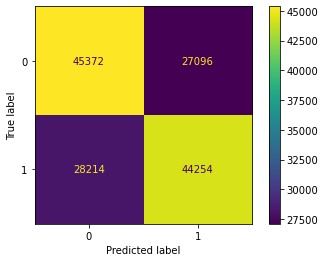

In [16]:
cm_train = confusion_matrix(y_train_over,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
disp.plot()
plt.show()

### Confusion Matrix on Test set:

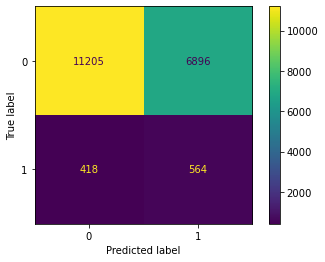

In [17]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot()
plt.show()

In [18]:
X_train_over.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,-0.056955,0.168724,-1.845500,0.717794,-0.359328,-0.207691,-0.214318,0.086269,-0.432081,0.263883,...,-0.542195,1.015142,-0.505525,-0.653476,2.260474,-0.458442,-0.54915,-0.545734,-0.506485,-0.382251
1,-0.054842,0.930882,-1.256941,0.348291,-0.142177,-0.207691,2.229416,-1.638543,0.754216,-1.101594,...,-0.542195,-0.985084,-0.505525,1.530279,-0.442385,-0.458442,-0.54915,-0.545734,-0.506485,-0.382251
2,-0.055899,1.069456,1.097296,0.348291,0.183550,0.777190,-0.476147,1.545725,-1.618377,0.036303,...,-0.542195,1.015142,-0.505525,-0.653476,-0.442385,-0.458442,-0.54915,1.832395,-0.506485,-0.382251
3,-0.054842,2.039475,0.508737,-1.129723,-0.250753,-0.207691,-0.912528,-0.776137,0.019842,1.856940,...,1.844356,-0.985084,-0.505525,-0.653476,-0.442385,-0.458442,-0.54915,-0.545734,1.974392,-0.382251
4,-0.056955,0.003242,0.508737,0.717794,-0.359328,-0.207691,-0.650700,0.086269,-0.206119,-0.646435,...,1.844356,-0.985084,-0.505525,-0.653476,2.260474,-0.458442,-0.54915,-0.545734,1.974392,-0.382251


In [19]:
X_train.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
65175,0,64.000000,1,9,0,0,28,31,25,8,...,34,1,93,12,95,9,95,9,92,10
32526,2,75.000000,2,8,2,0,56,5,46,2,...,23,1,95,10,91,2,96,2,86,12
63533,1,77.000000,6,8,5,5,25,53,4,7,...,21,1,91,3,94,10,95,12,91,3
61555,2,91.000000,5,4,1,0,20,18,33,15,...,70,1,94,6,94,4,95,5,87,3
36693,0,61.611649,5,9,0,0,23,31,29,4,...,0,2,95,10,95,4,95,10,94,10


### Business Impact: 

#### Is the cost of a false positive equals to the cost of the false negative?

In [20]:
#For this reason, let's create a new DataFrame to compare the predictions of our model to the information of donors
#alongside the value of each donation.

#This column represents reflects whether a customer made a donation (1) or not (0):
business_impact = y_test[["TARGET_B"]]

#This column contains the predictions made by our model:
business_impact["TARGET_B_pred"] = y_pred_test

#We get the indices of our new DataFrame, which is based on the indices of y_test:
business_impact_indices = business_impact.index

#We apply those to the column that contains the values of each donation and we store those values in a variable:
target_d_toconcat = target[["TARGET_D"]].loc[business_impact_indices]

#Finally we add this column to our DataFrame for comparison:
business_impact["TARGET_D"] = target_d_toconcat["TARGET_D"]
business_impact

,TARGET_B,TARGET_B_pred,TARGET_D
6897,0,0,0.0
30988,0,0,0.0
57472,1,1,20.0
21853,0,0,0.0
12122,0,0,0.0
...,...,...,...
2073,0,1,0.0
28354,0,0,0.0
27704,1,0,15.0
4430,0,0,0.0


#### False positives:

Let's filter out the False positives, hence, those customers that the model classified as donors but actually were not:

In [21]:
false_positives = business_impact[(business_impact["TARGET_B"] == 0) & (business_impact["TARGET_B_pred"] == 1)]
false_positives

,TARGET_B,TARGET_B_pred,TARGET_D
93873,0,1,0.0
92126,0,1,0.0
4702,0,1,0.0
20722,0,1,0.0
40068,0,1,0.0
...,...,...,...
80597,0,1,0.0
44855,0,1,0.0
64527,0,1,0.0
58842,0,1,0.0


Let's calculate the mean donation per donor:

In [22]:
false_positive_loss = round(business_impact["TARGET_D"].mean(),2)
false_positive_loss

0.79

We are losing on average 0.79 USD on each Customer classified as donor, who eventually did not donate.

#### False negatives:

Now let's filter our those customers who actually made a donation but the model classified them as if they did not:

In [23]:
false_negative = business_impact[(business_impact["TARGET_B"] == 1) & (business_impact["TARGET_B_pred"] == 0)]
false_negative

,TARGET_B,TARGET_B_pred,TARGET_D
14302,1,0,10.0
19040,1,0,23.0
53199,1,0,15.0
68608,1,0,20.0
12273,1,0,21.0
...,...,...,...
85226,1,0,40.0
7477,1,0,12.0
66124,1,0,21.0
61019,1,0,16.0


In [24]:
false_negative_loss = round(false_negative['TARGET_D'].mean(),2)
false_negative_loss

20.95

We are losing on average 20.95 USD on each Customer classified as donor, who eventually did not donate.

#### How would you change your algorithm or data in order to maximize the return of the bussiness?

- First of all, I would combine Downsampling with Oversampling to mitigate the Class imbalance. This will drastically change the way our model classifies data.

- Then I would use a Randomized Search method to find the best combination of Hyperparameters and I would set the focus of my model to improve Recall as much as possible, since our cost of False Negatives is drastically higher than the one of False Positives:

In [25]:
#Balancing the Class imbalance:

import math

majority_indexes = list(y_train[y_train["TARGET_B"] == 0].index) 
minority_indexes = list(y_train[y_train["TARGET_B"] == 1].index) 

#Manual downsampling:

new_majority_indexes = np.random.choice(majority_indexes,size = math.ceil((len(majority_indexes) + len(minority_indexes))/2), replace = False)

#Manual Oversampling:

new_minority_indexes = np.random.choice(minority_indexes, size = math.ceil((len(majority_indexes) + len(minority_indexes))/2), replace = True)

#We put the indexes together in a list:

all_indexes = list(new_majority_indexes) + list(new_minority_indexes)

#We pass the indexes to both X_train and y_train:

y_train_balanced = y_train.loc[all_indexes,:]
X_train_balanced = X_train_scaled_df.loc[all_indexes,:]


In [48]:
# Let's store another Random Forest Classifier in a different variable:

clf2 = RandomForestClassifier()

In [61]:
#Defining the Randomized Search parameters:

from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= [3,4,5,6,7,8,9,10,None] # A list of the possible values of max_depth to try at random
min_samples_split_choices = [2,3,4,5,6,7,8,9,10] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10] # A list of the possible values of min_samples_leaf to try 
max_features_choices = [2,3,4,5,6] # A list of max_features to use in the Decission tree
random_state_choices = [5,10,5,20,25]
#Storing those parameters in a Dictionary:

random_grid = {'max_depth': max_depth_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices,
               'random_state': random_state_choices}

In [62]:
# Defining the Scores we are going to evaluate.
# Our main focus will be to maximize the performance of our Model based on the Recall.

from sklearn.metrics import make_scorer

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)}

In [63]:
def random_search_wrapper(clf, random_grid, scorers, X_train, X_test, y_train, folds = 5, iters = 5, refit_score = 'recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    random_search = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, scoring=scorers, refit=refit_score,
                           cv=folds, n_iter=iters)
    #random_search.fit(X_train_over, y_train_over['TARGET_B'])
    random_search.fit(X_train, y_train)

    # make the predictions
    #y_pred_test = random_search.predict(X_test_scaled_df)
    y_pred_test = random_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(random_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    
    return random_search

In [64]:
random_search_clf = random_search_wrapper(clf2, random_grid, scorers, X_train_balanced, X_test_scaled_df, y_train_balanced['TARGET_B'])

Best params for recall_score
{'random_state': 5, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 4, 'max_depth': 10}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg     14008      4093
pos       633       349


Based on the Confusion Matrix, we can see that the number False Negatives has not decreased even though we coded our model to get the best recall possible, but this is due to the fact that we are using a different approach to tackle class imbalance, additionally, the class imbalance is very noticeable.

Let's visualize a DataFrame with the results we got after performing 5 Cross Validations:
- Our chosen model was the one listed the first, since we are sorting the scores
- Prioritizing the Mean Test Recall Score in descending order.
- As you can see, all metrics are on high 0.9s

In [76]:
results = pd.DataFrame(random_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_recall_score', 'mean_test_precision_score', 'mean_test_accuracy_score', 'param_max_depth', 
         'param_max_features', 'param_min_samples_split']].round(3).head()

,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split
2,0.860,0.792,0.817,10,4,9
0,0.815,0.747,0.770,9,4,10
4,0.750,0.696,0.712,8,2,9
3,0.721,0.676,0.688,7,6,8
1,0.679,0.636,0.645,6,2,6
